<a href="https://colab.research.google.com/github/ArjunNair2004/Image-Compression/blob/main/DL_Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

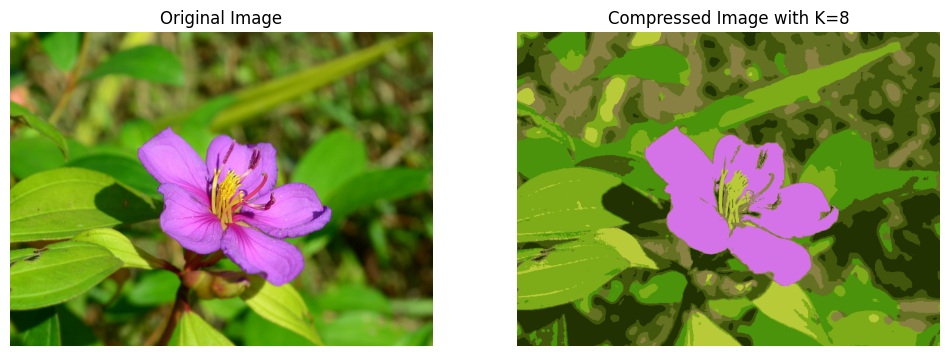

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/samimg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)

# Convert pixel values to float
pixels = np.float32(pixels)

# Define criteria and apply KMeans algorithm
k = 8  # Number of clusters (colors)
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Replace each pixel with its corresponding cluster center
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image, 0, 255)

# Reshape back to the original image shape
compressed_image = compressed_image.reshape(image.shape)
compressed_image = np.uint8(compressed_image)

# Display the original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(compressed_image)
ax[1].set_title('Compressed Image with K={}'.format(k))
ax[1].axis('off')

plt.show()
